In [ ]:
from IPython.display import clear_output
!pip install imutils
clear_output()

In [ ]:
!pip install colorama


In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [ ]:
!pip install plotly


In [ ]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *

from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb
import numpy as np
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

print("All modules have been imported")

All modules have been imported


In [ ]:
!apt-get install tree
clear_output()
!mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO
!tree -d

.
├── drive
│   ├── MyDrive
│   │   ├── Colab Notebooks
│   │   │   ├── brain_tumor_dataset
│   │   │   │   ├── no
│   │   │   │   └── yes
│   │   │   ├── Brain tumor dataset
│   │   │   │   ├── Test
│   │   │   │   │   ├── No
│   │   │   │   │   └── Yes
│   │   │   │   ├── training
│   │   │   │   │   ├── No
│   │   │   │   │   └── Yes
│   │   │   │   └── validation
│   │   │   │       ├── No
│   │   │   │       └── Yes
│   │   │   └── BRAIN_TUMOR_DATASET - Copy
│   │   │       ├── NO
│   │   │       └── YES
│   │   ├── TEST
│   │   │   ├── NO
│   │   │   └── YES
│   │   ├── TRAIN
│   │   │   ├── NO
│   │   │   └── YES
│   │   └── VAL
│   │       ├── NO
│   │       └── YES
│   └── Othercomputers
│       └── USB and External Devices
│           └── USB_DEVICE_1646242428
│               ├── Field based system
│               │   └── filed_monitring
│               ├── Library Proteus
│               ├── Need for Speed Most Wanted [DoubleL]
│               ├── Project folder
│           

In [ ]:
import shutil

folders = ['TEST_CROP', 'TRAIN_CROP', 'VAL_CROP']

for folder in folders:
    shutil.rmtree(folder)


In [ ]:
import os
import shutil
import random

IMG_PATH = '/content/drive/MyDrive/Colab Notebooks/BRAIN_TUMOR_DATASET - Copy'

TRAIN_DIR = '/content/TRAIN'
TEST_DIR = '/content/TEST'
VAL_DIR = '/content/VAL'

os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)
os.makedirs(VAL_DIR, exist_ok=True)

train_count = 0
test_count = 0
val_count = 0

for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
        print("Processing class:", CLASS)
        class_path = os.path.join(IMG_PATH, CLASS)
        print("Class path:", class_path)
        images = os.listdir(class_path)
        random.shuffle(images)  # Shuffle images to randomize the selection
        IMG_NUM = len(images)
        print("Number of images in class:", IMG_NUM)

        train_limit = int(0.5 * IMG_NUM)
        test_limit = int(0.3 * IMG_NUM)
        val_limit = IMG_NUM - train_limit - test_limit

        processed_count = 0
        for FILE_NAME in images:
            img = os.path.join(class_path, FILE_NAME)
            if processed_count < test_limit:
                destination_path = os.path.join(TEST_DIR, CLASS.upper(), FILE_NAME)
                shutil.copy(img, destination_path)
                print("Transferred", img, "to", destination_path)
                test_count += 1
            elif processed_count < test_limit + train_limit:
                destination_path = os.path.join(TRAIN_DIR, CLASS.upper(), FILE_NAME)
                shutil.copy(img, destination_path)
                print("Transferred", img, "to", destination_path)
                train_count += 1
            else:
                destination_path = os.path.join(VAL_DIR, CLASS.upper(), FILE_NAME)
                shutil.copy(img, destination_path)
                print("Transferred", img, "to", destination_path)
                val_count += 1
            processed_count += 1

print("Total images transferred to TRAIN directory:", train_count)
print("Total images transferred to TEST directory:", test_count)
print("Total images transferred to VAL directory:", val_count)


Streaming output truncated to the last 5000 lines.
Transferred /content/drive/MyDrive/Colab Notebooks/BRAIN_TUMOR_DATASET - Copy/YES/Tr-gl_0037.jpg to /content/TRAIN/YES/Tr-gl_0037.jpg
Transferred /content/drive/MyDrive/Colab Notebooks/BRAIN_TUMOR_DATASET - Copy/YES/Tr-gl_0220.jpg to /content/TRAIN/YES/Tr-gl_0220.jpg
Transferred /content/drive/MyDrive/Colab Notebooks/BRAIN_TUMOR_DATASET - Copy/YES/Tr-pi_0539.jpg to /content/TRAIN/YES/Tr-pi_0539.jpg
Transferred /content/drive/MyDrive/Colab Notebooks/BRAIN_TUMOR_DATASET - Copy/YES/Te-pi_0046.jpg to /content/TRAIN/YES/Te-pi_0046.jpg
Transferred /content/drive/MyDrive/Colab Notebooks/BRAIN_TUMOR_DATASET - Copy/YES/Te-gl_0158.jpg to /content/TRAIN/YES/Te-gl_0158.jpg
Transferred /content/drive/MyDrive/Colab Notebooks/BRAIN_TUMOR_DATASET - Copy/YES/Tr-me_0629.jpg to /content/TRAIN/YES/Tr-me_0629.jpg
Transferred /content/drive/MyDrive/Colab Notebooks/BRAIN_TUMOR_DATASET - Copy/YES/Tr-me_0451.jpg to /content/TRAIN/YES/Tr-me_0451.jpg
Transferred

In [ ]:
import os
import glob

dataset_dir = '/content/drive/MyDrive/Colab Notebooks/BRAIN_TUMOR_DATASET - Copy/'

for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(folder_path):
        num_images = len(glob.glob(os.path.join(folder_path, '*.jpg')))
        print(f"Number of images in {folder_name}: {num_images}")


Number of images in YES: 5104
Number of images in NO: 2071


In [ ]:
def load_data(dir_path, img_size=(100,100)):

    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
import os
import cv2

def load_data(dir_path, img_size):
    images = []
    labels = []
    print("Loading images from", dir_path, "directory.")
    for i, path in enumerate(os.listdir(dir_path)):
        if not path.startswith('.'):
            labels.append(path)
            for file in os.listdir(os.path.join(dir_path, path)):
                if not file.startswith('.'):
                    img = cv2.imread(os.path.join(dir_path, path, file))
                    if img is not None:
                        img = cv2.resize(img, img_size)
                        images.append(img)
                    else:
                        print("Failed to load image:", os.path.join(dir_path, path, file))
    print(len(images), "images loaded from", dir_path, "directory.")
    return images, labels

TRAIN_DIR = '/content/TRAIN/'
TEST_DIR = '/content/TEST/'
VAL_DIR = '/content/VAL/'
IMG_SIZE = (224,224)

X_train, y_train = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test = load_data(TEST_DIR, IMG_SIZE)
X_val, y_val = load_data(VAL_DIR, IMG_SIZE)


Loading images from /content/TRAIN/ directory.
3587 images loaded from /content/TRAIN/ directory.
Loading images from /content/TEST/ directory.
2152 images loaded from /content/TEST/ directory.
Loading images from /content/VAL/ directory.
1436 images loaded from /content/VAL/ directory.


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

def load_data(dir_path, img_size=(100, 100)):
    """
    Load resized images as np.arrays to workspace.
    """
    X = []
    y = []
    labels = {}
    i = 0
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(os.path.join(dir_path, path)):
                if not file.startswith('.'):
                    img = cv2.imread(os.path.join(dir_path, path, file))
                    if img is not None:
                        img = cv2.resize(img, img_size)
                        X.append(img)
                        y.append(i)
                    else:
                        print(f"Failed to load image: {os.path.join(dir_path, path, file)}")
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

TRAIN_DIR = '/content/TRAIN/'
TEST_DIR = '/content/TEST/'
VAL_DIR = '/content/VAL/'
IMG_SIZE = (224, 224)

X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)


100%|██████████| 2/2 [00:07<00:00,  3.99s/it]


3587 images loaded from /content/TRAIN/ directory.


100%|██████████| 2/2 [00:05<00:00,  2.98s/it]


2152 images loaded from /content/TEST/ directory.


100%|██████████| 2/2 [00:04<00:00,  2.34s/it]

1436 images loaded from /content/VAL/ directory.


In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [ ]:
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

In [ ]:
print(fig)


Figure({
    'data': [{'marker': {'color': '#33cc33'},
              'name': 'No',
              'opacity': 0.7,
              'type': 'bar',
              'x': [Train Set, Validation Set, Test Set],
              'y': [1035, 415, 621]},
             {'marker': {'color': '#ff3300'},
              'name': 'Yes',
              'opacity': 0.7,
              'type': 'bar',
              'x': [Train Set, Validation Set, Test Set],
              'y': [2552, 1021, 1531]}],
    'layout': {'template': '...',
               'title': {'text': 'Count of classes in each set'},
               'xaxis': {'title': {'text': 'Set'}},
               'yaxis': {'title': {'text': 'Count'}}}
})


In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot

fig = go.Figure({
    'data': [{'marker': {'color': '#33cc33'},
              'name': 'No',
              'opacity': 0.7,
              'type': 'bar',
              'x': ['Train Set', 'Validation Set', 'Test Set'],
              'y': [2000, 20, 507]},
             {'marker': {'color': '#ff3300'},
              'name': 'Yes',
              'opacity': 0.7,
              'type': 'bar',
              'x': ['Train Set', 'Validation Set', 'Test Set'],
              'y': [2147, 20, 506]}],
    'layout': {'title': {'text': 'Count of classes in each set'},
               'xaxis': {'title': {'text': 'Set'}},
               'yaxis': {'title': {'text': 'Count'}}}
})

iplot(fig)


In [ ]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

In [ ]:
TRAIN_DIR = '/content/TRAIN/'
TEST_DIR = '/content/TEST/'
VAL_DIR = '/content/VAL/'
IMG_SIZE = (224,224)

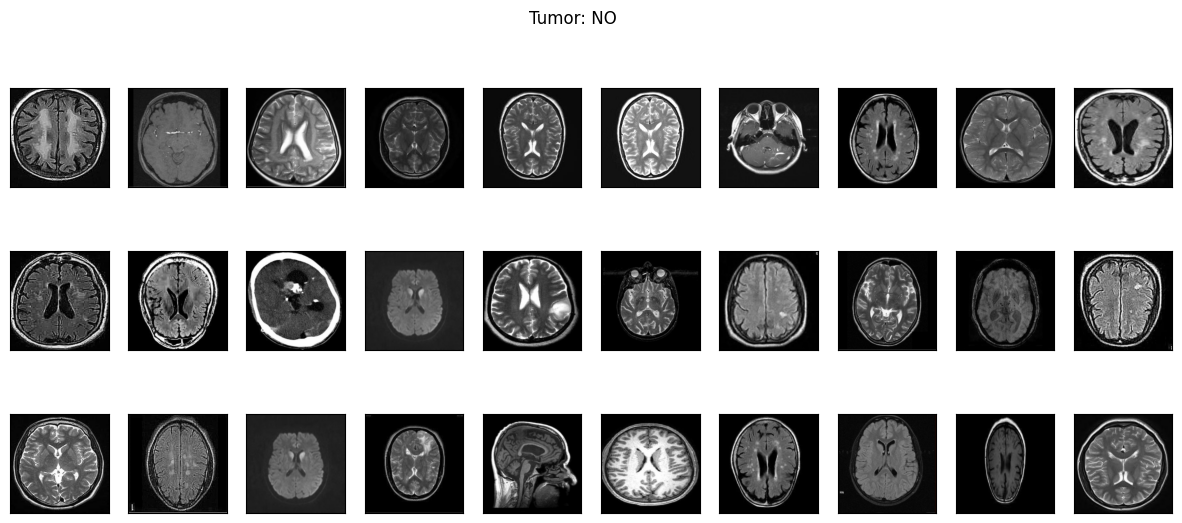

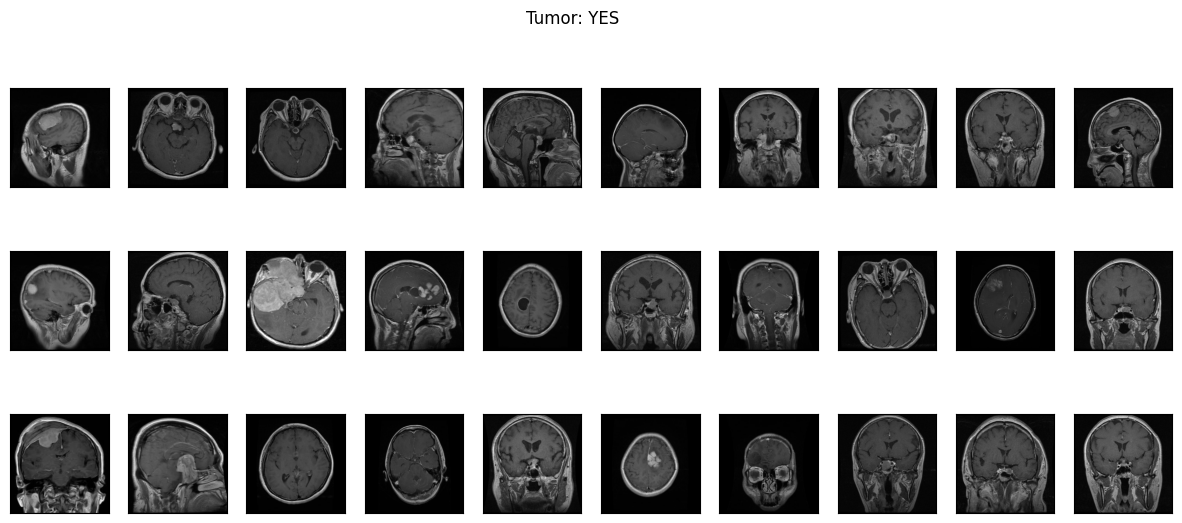

In [ ]:
plot_samples(X_train, y_train, labels, 30)

In [ ]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

In [ ]:
import imutils
img = cv2.imread('/content/TRAIN/YES/Te-glTr_0003.jpg', cv2.IMREAD_UNCHANGED)

img = cv2.resize(
            img,
            dsize=IMG_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)


thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

In [ ]:
import cv2
import imutils

image_path = '/content/TRAIN/YES/Te-glTr_0003.jpg'

img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

if img is None:
    print(f"Failed to load image at path: {image_path}")
else:
    img = cv2.resize(
        img,
        dsize=IMG_SIZE,
        interpolation=cv2.INTER_CUBIC
    )

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

    img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
    img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
    img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
    img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)


    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()




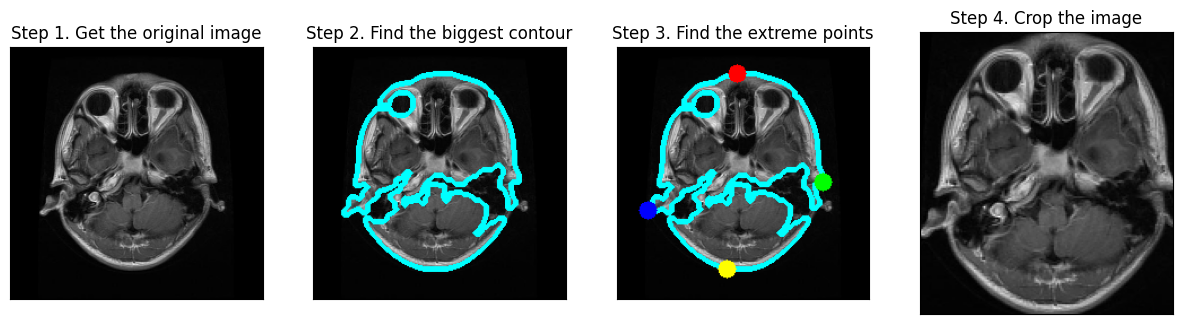

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [ ]:
import numpy as np

def crop_imgs(set_name, add_pixels_value=0):
    set_new = np.empty((len(set_name), IMG_SIZE[0], IMG_SIZE[1], 3), dtype=np.uint8)
    for i, img in enumerate(set_name):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

        new_img_resized = cv2.resize(new_img, IMG_SIZE, interpolation=cv2.INTER_CUBIC)

        set_new[i] = new_img_resized
    return set_new


X_train_crop = crop_imgs(set_name=X_train)
X_val_crop = crop_imgs(set_name=X_val)
X_test_crop = crop_imgs(set_name=X_test)


In [ ]:
X_train_crop = crop_imgs(set_name=X_train)
X_val_crop = crop_imgs(set_name=X_val)
X_test_crop = crop_imgs(set_name=X_test)

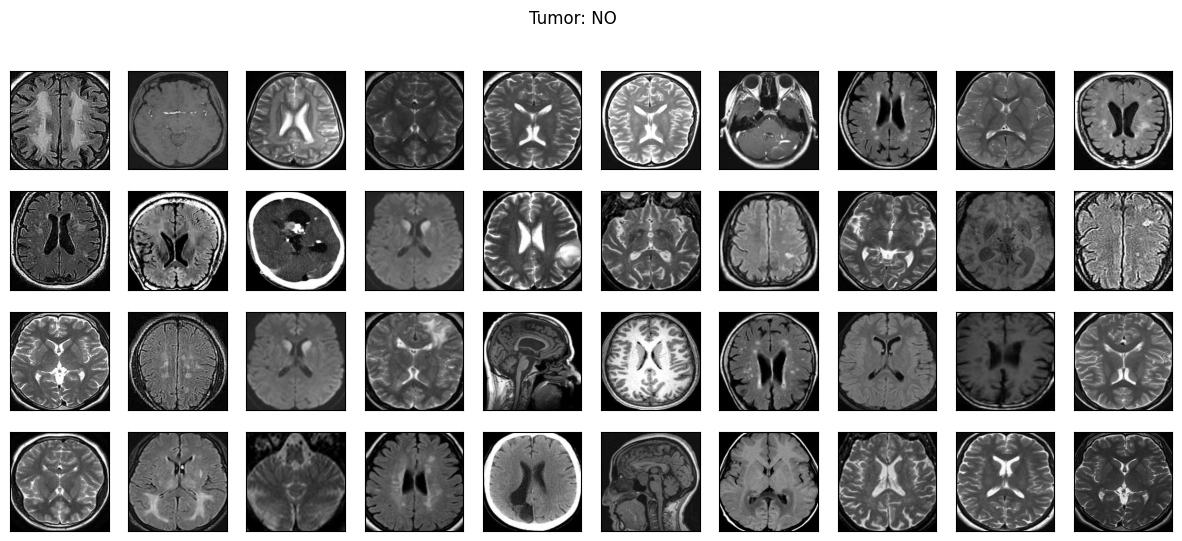

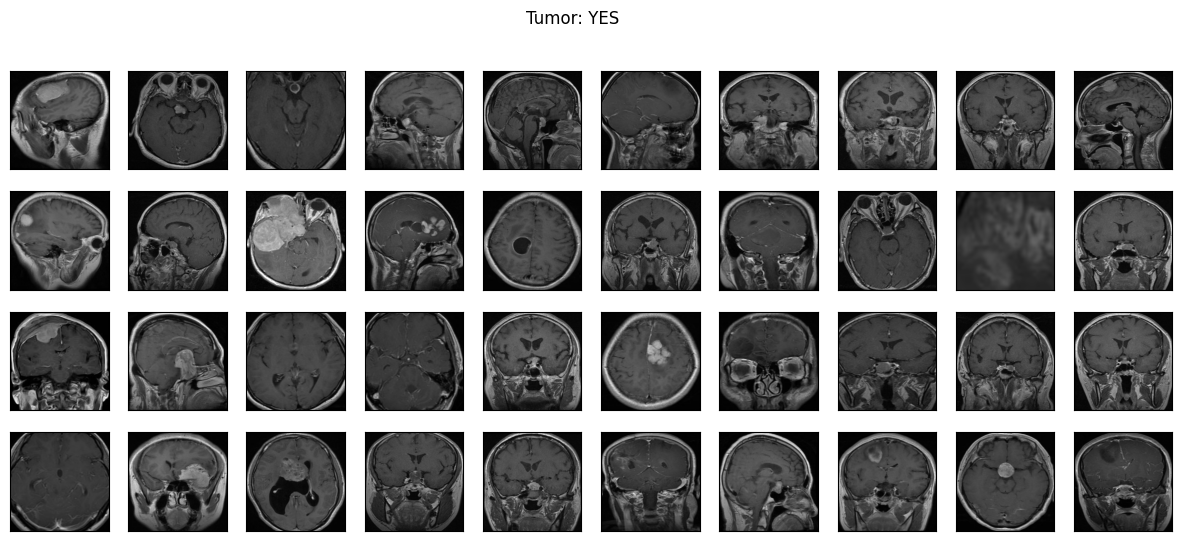

In [ ]:
plot_samples(X=X_train_crop, y=y_train, labels_dict=labels, n=40)

In [ ]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [ ]:
!mkdir TRAIN_CROP TEST_CROP VAL_CROP TRAIN_CROP/YES TRAIN_CROP/NO TEST_CROP/YES TEST_CROP/NO VAL_CROP/YES VAL_CROP/NO

save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_val_crop, y_val, folder_name='VAL_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

In [ ]:
def preprocess_imgs(set_name, img_size):
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [ ]:
X_train_prep = preprocess_imgs(set_name=X_train_crop, img_size=IMG_SIZE)
X_test_prep = preprocess_imgs(set_name=X_test_crop, img_size=IMG_SIZE)
X_val_prep = preprocess_imgs(set_name=X_val_crop, img_size=IMG_SIZE)

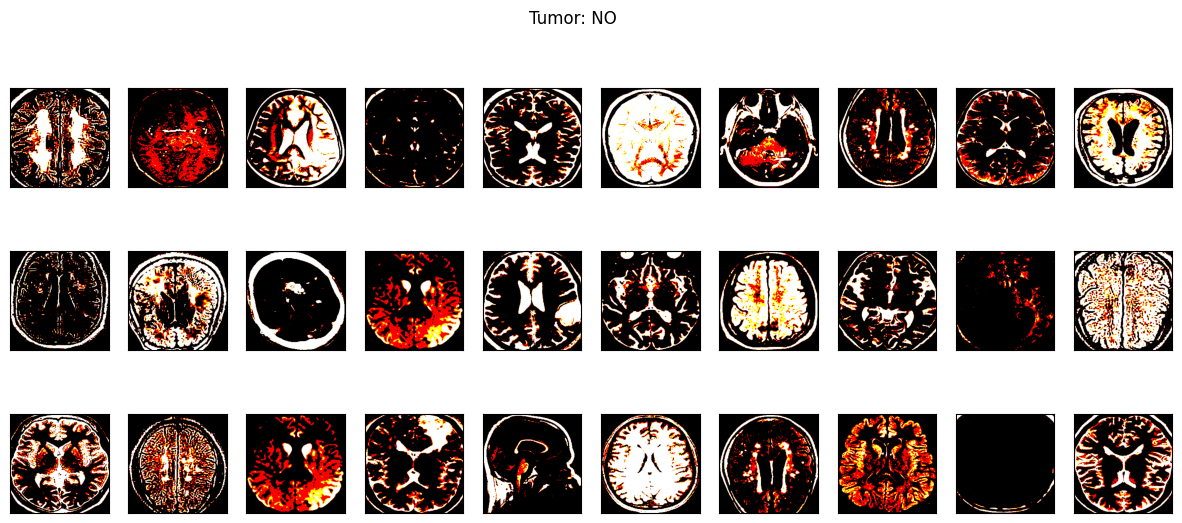

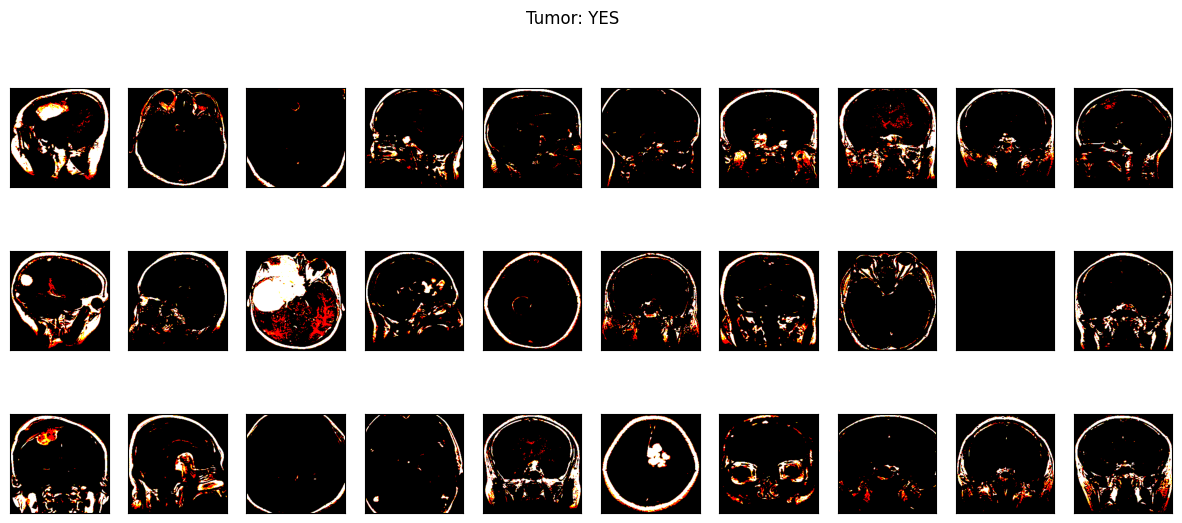

In [ ]:
plot_samples(X_train_prep, y_train, labels, 30)

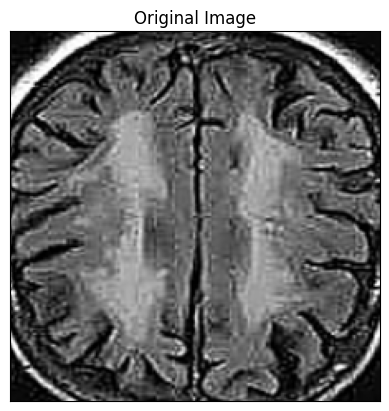

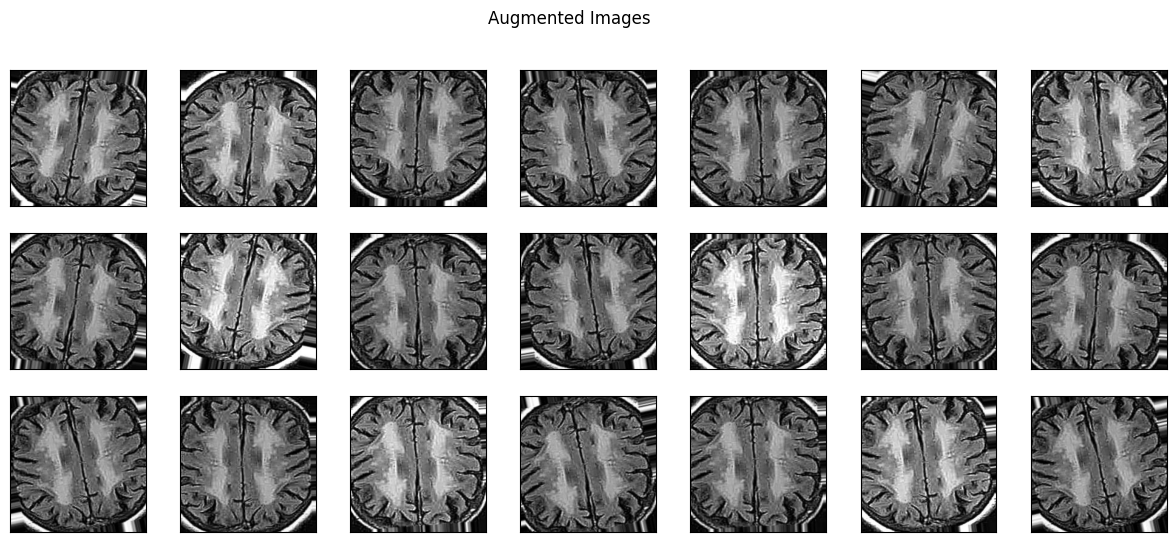

In [ ]:
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

import os
os.makedirs('preview', exist_ok=True)

x = X_train_crop[0]
x = x.reshape((1,) + x.shape)

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break

plt.imshow(X_train_crop[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augmented Images')
plt.show()


In [ ]:
!rm -rf preview/

In [ ]:
TRAIN_DIR = '/content/TRAIN/'
VAL_DIR = '/content/VAL/'
RANDOM_SEED = 42
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    seed=RANDOM_SEED
)


validation_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary',
    seed=RANDOM_SEED
)

Found 3587 images belonging to 2 classes.
Found 1436 images belonging to 2 classes.


In [ ]:
base_Neural_Net= VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_Neural_Net)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

for layer in base_Neural_Net.layers:
    layer.trainable = False


model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy' , 'AUC']
)

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 batch_normalization (Batch  (None, 25088)             100352    
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                         

In [ ]:
from keras.applications import VGG16

base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


In [ ]:
NUM_CLASSES = 1

model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
EPOCHS = 30
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=25
)


<ipython-input-37-107a86665bb0>:2: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/30
50/50 [==============================] - 34s 667ms/step - loss: 1.2453 - accuracy: 0.9230 - val_loss: 1.5374 - val_accuracy: 0.9425
Epoch 2/30
50/50 [==============================] - 31s 612ms/step - loss: 1.1702 - accuracy: 0.9306 - val_loss: 0.5798 - val_accuracy: 0.9600
Epoch 3/30
50/50 [==============================] - 31s 631ms/step - loss: 1.0240 - accuracy: 0.9394 - val_loss: 0.6268 - val_accuracy: 0.9700
Epoch 4/30
50/50 [==============================] - 30s 609ms/step - loss: 0.7400 - accuracy: 0.9494 - val_loss: 1.1957 - val_accuracy: 0.9225
Epoch 5/30
50/50 [==============================] - 34s 672ms/step - loss: 0.9924 - accuracy: 0.9413 - val_loss: 0.6983 - val_accuracy: 0.9625
Epoch 6/30
50/50 [==============================] - 31s 612ms/step - loss: 0.7826 - accuracy: 0.9469 - val_loss: 0.6694 - val_accuracy: 0.9650
Epoch 7/30
50/50 [==============================] - 53s 1s/step - loss: 0.7060 - accuracy: 0.9594 - val_loss: 0.7140 - val_accuracy: 0.9750
Ep

68/68 [==============================] - 12s 179ms/step
Test Accuracy = 0.95


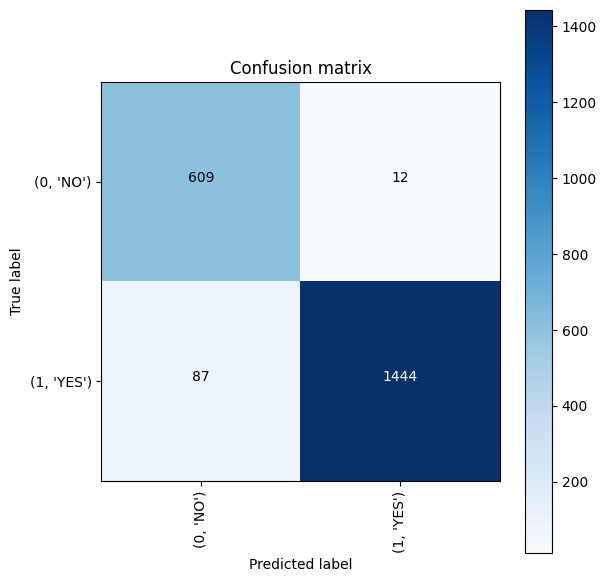

In [ ]:
predictions = model.predict(X_test_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, predictions)
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

In [ ]:
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test, predictions),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test, predictions, average='weighted'),4))



Accuracy score is : 0.954
F1 Score is : 0.9547


In [ ]:
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test, predictions),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test, predictions, average='weighted'),4))



Accuracy score is : 0.9269
F1 Score is : 0.9266


In [ ]:
from sklearn.metrics import f1_score

weighted_f1 = f1_score(y_test, predictions, average='weighted')

print('Weighted F1 Score:', np.round(weighted_f1, 4))


Weighted F1 Score: 0.9547


In [ ]:
model.save('brain_tumor_detection_model.h5')

from keras.models import load_model

saved_model = load_model('brain_tumor_detection_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
saved_model_path = 'brain_tumor_detection_model.keras'
saved_model.save(saved_model_path)

from keras.models import load_model

saved_model = load_model(saved_model_path)


In [ ]:
model.save('/content/drive/MyDrive/brain_tumor_detection_model.h5')


In [ ]:
Sfrom tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/brain_tumor_detection_model.h5')

